# E-mail Spam Detection Model
Develop accurate email spam detector using machine learning for classification.



In [1]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [11]:
# Reading and Cheking data
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
print("Shape: ", df.shape)
df.head()

Shape:  (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
#Checking null values 
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [13]:
#Removing useless columns and renaming columns
df.drop(columns=["Unnamed: 2", "Unnamed: 3","Unnamed: 4"], inplace=True)
df.rename({"v1":"Category", "v2": "Message"}, axis=1, inplace=True)

In [14]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<AxesSubplot:>

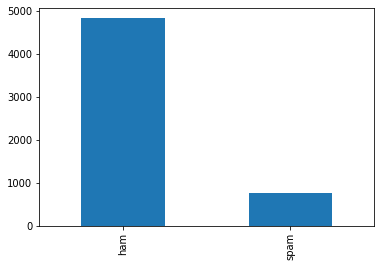

In [15]:
#Count plot for ham and spam email
df.Category.value_counts().plot(kind="bar")

In [16]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [17]:
# Creating new encoded column of Category
df["spam"]=df["Category"].map({"spam":1, "ham":0})

In [18]:
# Train Test split
x_train, x_test, y_train, y_test= train_test_split(df.Message, df.spam, test_size=0.25, random_state=42)

In [19]:
#Count Vectorize for Message (E-mail) text
cv=CountVectorizer()
x_train_count=cv.fit_transform(x_train)
x_test_count= cv.transform(x_test)

In [20]:
# Training model using Multinomial Naive Bayes Algorithm
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [21]:
# Predicting Model
y_pred=model.predict(x_test_count)

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: ",accuracy*100,"%")
print(f"Precision: ",precision)
print(f"Recall: ",recall)
print(f"F1 Score: ", f1)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy:  98.20531227566404 %
Precision:  0.9825581395348837
Recall:  0.8848167539267016
F1 Score:  0.931129476584022
ROC-AUC Score: 0.94


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1202
           1       0.98      0.88      0.93       191

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



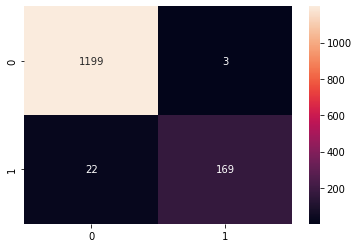

In [23]:
# Plotting Confussion Matrix and viewing classification report
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.5g')
print(classification_report(y_test, y_pred))